<a href="https://colab.research.google.com/github/alwanrahmanas/CentralLimitTheorem/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team : Infinity Ara Ara**
Members :
1. Alwan Rahmana Subian (Polytechnic of Statistics STIS)
2. Rafif Hasabi (Polytechnic of Statistics STIS)
3. A.A. Gede Rai Bhaskara D. P. (Polytechnic of Statistics STIS)


# **1. Business Undestanding**

## **1.1. Problem Statement**

Sebuah perusahaan telekomunikasi ingin menganalisis perilaku pelanggannya. Diberikan dataset berikut, bangunlah sebuah solusi yang bertujuan untuk memberikan wawasan yang bermakna kepada perusahaan telekomunikasi tersebut. Solusi dapat berbentuk model kecerdasan buatan (AI), dasbor, atau laporan analisis. Jika peserta berencana membangun model AI, peserta bebas menentukan fitur, label, dan metrik saat membangun model. Anda diharapkan untuk mengusulkan solusi inovatif berdasarkan dataset.

## **1.2. Data Dictionary**

1. Customer ID (A unique customer identifier)
2. Tenure Months (How long the customer has been with the company by the
end of the quarter specified above)
3. Location (Customer’s residence - City)
4. Device Class (Device classification)
5. Games Product (Whether the customer uses the internet service for games
product)
6. Music Product (Whether the customer uses the internet service for music
product)
7. Education Product (Whether the customer uses the internet service for
education product)
8. Call Center (Whether the customer uses the call center service)
9. Video Product (Whether the customer uses video product service)
10. Use MyApp (Whether the customer uses MyApp service)
11. Payment Method (The method used for paying the bill)
12. Monthly Purchase (Total customer’s monthly spent for all services with the
unit of thousands of IDR)
13. Churn Label (Whether the customer left the company within a time period)
14. Longitude (Customer’s residence - Longitude)
15. Latitude (Customer’s residence - Latitude)
16. CLTV (Customer Lifetime Value with the unit of thousands of IDR -
Calculated using company’s formulas)

# **2. Prepare Work Environtment**

**Import Libraries**:

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install jenkspy
import jenkspy

**Connect Google Drive**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Load and Inspect Data**

In [ ]:
df_customer = pd.read_excel('/content/drive/MyDrive/DSW/Telco_customer_churn_adapted_v2.xlsx')

In [ ]:
df_customer.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


**Ukuran Dataset**:

In [ ]:
print('Rows:',df_customer.shape[0])
print('Columns:',df_customer.shape[1])

Rows: 7043
Columns: 16


**Informasi dari Dataset**:

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

**Insight**:


*   Terdapat 3 variabel numerik yaitu Tenure Months, Monthly Purchase, dan CLTV.
*   Menghapus ID karena tanpa ID setiap baris sudah pasti unique
*   Terdapat10 variabel kategorik

**Data Duplikat**:



In [ ]:
print("Duplicated records:",df_customer.duplicated().sum())

Duplicated records: 0


**Pemeriksaan Missing Value**:

In [ ]:
df_customer.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

Tidak terdapat *missing value* pada dataset.

# **4. Exploratory Data Analysis**

In [ ]:
# Membuat copy dari dataset
df_copy = df_customer.copy()

**Initial data cleaning**:

In [ ]:
def initial_cleaning(df):
  # Drop columns
  df.drop(['Customer ID'], axis=1, inplace=True)
  # Rename columns
  df.rename(columns = {
      'Customer ID' : 'id',
      'Tenure Months' : 'tenure_months',
      'Location' : 'location',
      'Device Class' : 'device_class',
      'Games Product' : 'games_product',
      'Music Product' : 'music_product',
      'Education Product' : 'education_product',
      'Call Center' : 'call_center',
      'Video Product' : 'video_product',
      'Use MyApp' : 'use_myapp',
      'Payment Method' : 'payment_method',
      'Monthly Purchase (Thou. IDR)' : 'monthly_purchase',
      'Churn Label' : 'churn_label',
      'Longitude' : 'longitude',
      'Latitude' : 'latitude',
      'CLTV (Predicted Thou. IDR)' : 'cltv'
  }, inplace = True)
  return df

df_copy = initial_cleaning(df_copy)

In [ ]:
df_copy.head()

,tenure_months,location,device_class,games_product,music_product,education_product,call_center,video_product,use_myapp,payment_method,monthly_purchase,churn_label,longitude,latitude,cltv
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


Dengan menggunakan k-modes -> numerik diubah ke categorical

In [ ]:
df_copy.describe()

,tenure_months,monthly_purchase,longitude,latitude,cltv
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [ ]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

In [ ]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df,
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

**Memeriksa Keberadaan Outlier.**


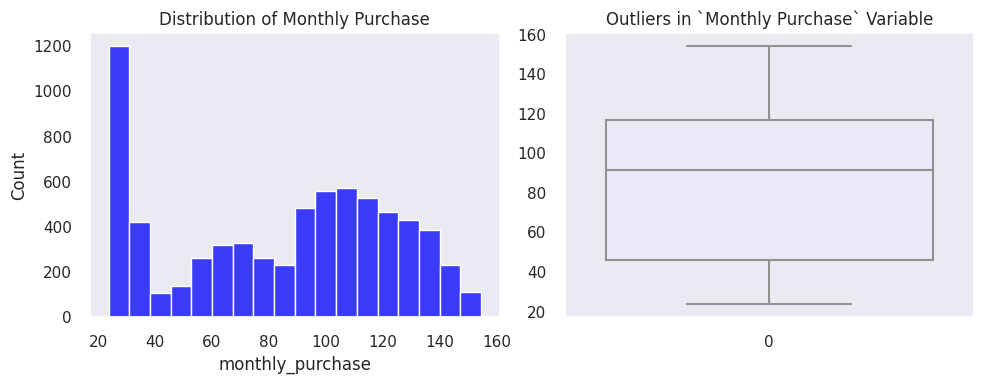

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_copy['monthly_purchase'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of Monthly Purchase')

sns.boxplot(df_copy['monthly_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Monthly Purchase` Variable')

plt.tight_layout()

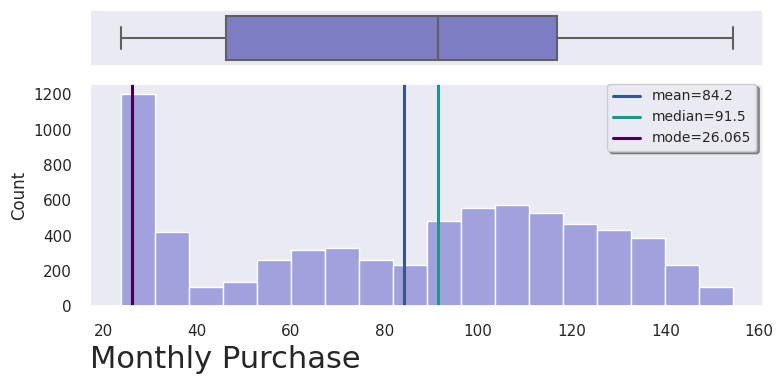

In [ ]:
num_plot(df_copy, 'monthly_purchase')
plt.show()

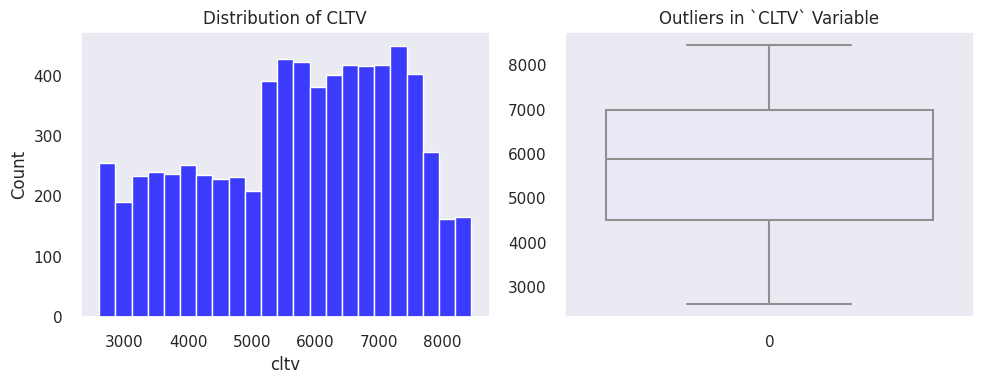

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_copy['cltv'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of CLTV')

sns.boxplot(df_copy['cltv'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `CLTV` Variable')

plt.tight_layout()

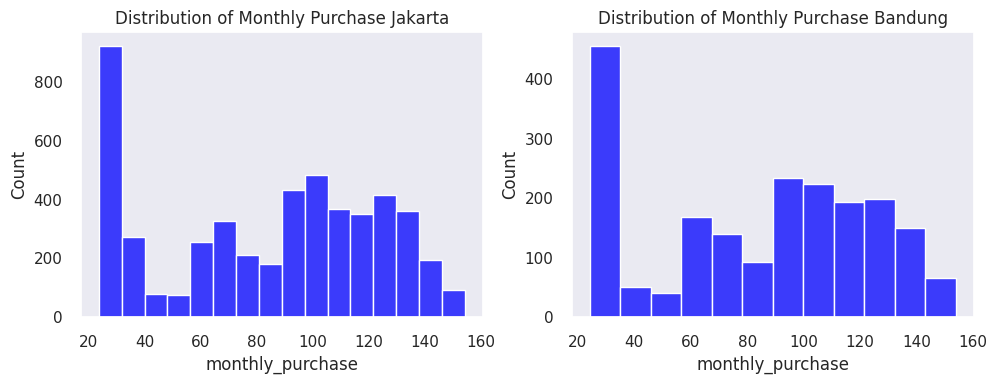

In [ ]:
df_jakarta = df_copy.query('location == "Jakarta"')
df_bandung = df_copy.query('location == "Bandung"')

fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_jakarta['monthly_purchase'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of Monthly Purchase Jakarta')

sns.histplot(df_bandung['monthly_purchase'], color = 'blue', ax = axes[1])
axes[1].set_title('Distribution of Monthly Purchase Bandung')

plt.tight_layout()

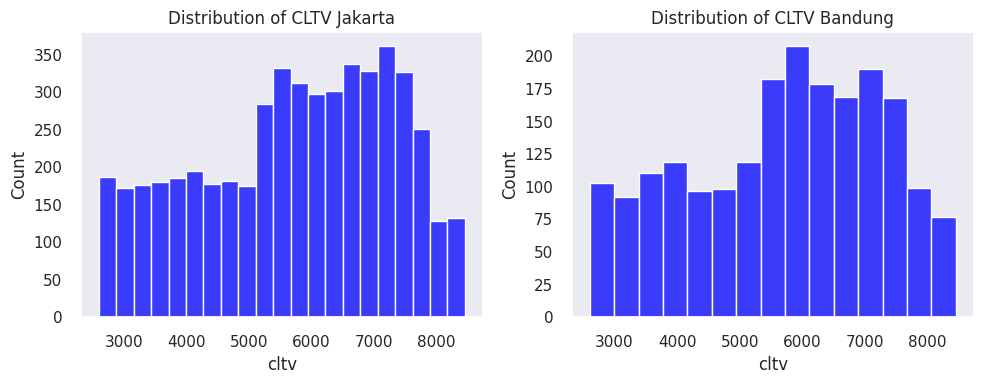

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_jakarta['cltv'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of CLTV Jakarta')

sns.histplot(df_bandung['cltv'], color = 'blue', ax = axes[1])
axes[1].set_title('Distribution of CLTV Bandung')

plt.tight_layout()

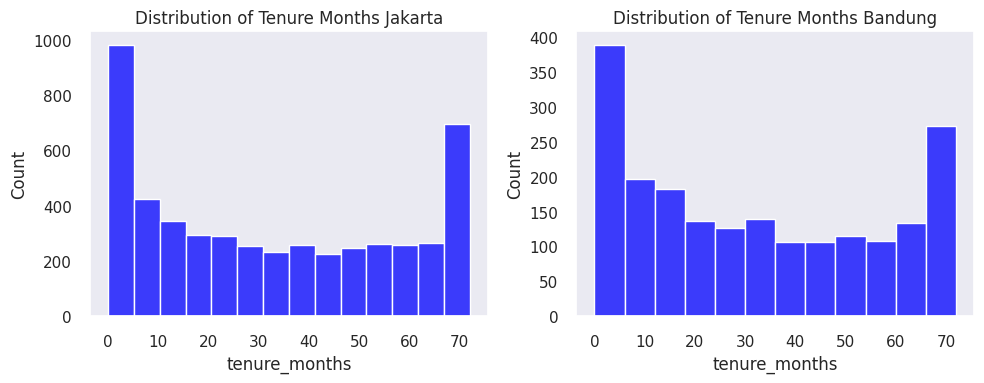

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_jakarta['tenure_months'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of Tenure Months Jakarta')

sns.histplot(df_bandung['tenure_months'], color = 'blue', ax = axes[1])
axes[1].set_title('Distribution of Tenure Months Bandung')

plt.tight_layout()

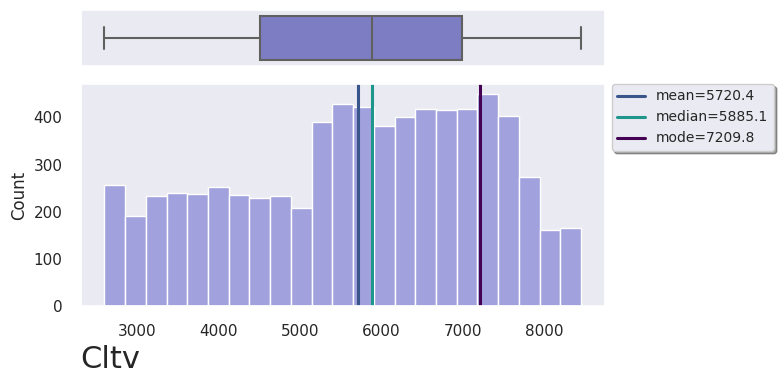

In [ ]:
num_plot(df_copy, 'cltv')
plt.show()

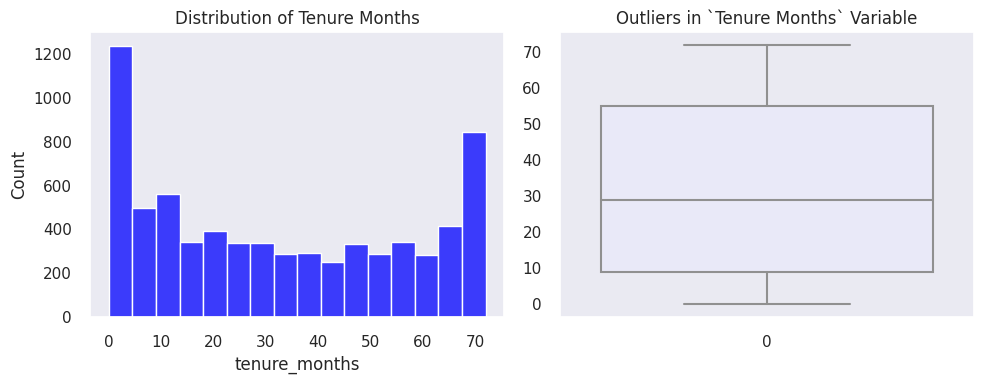

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_copy['tenure_months'], color = 'blue', ax = axes[0])
axes[0].set_title('Distribution of Tenure Months')

sns.boxplot(df_copy['tenure_months'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Tenure Months` Variable')

plt.tight_layout()

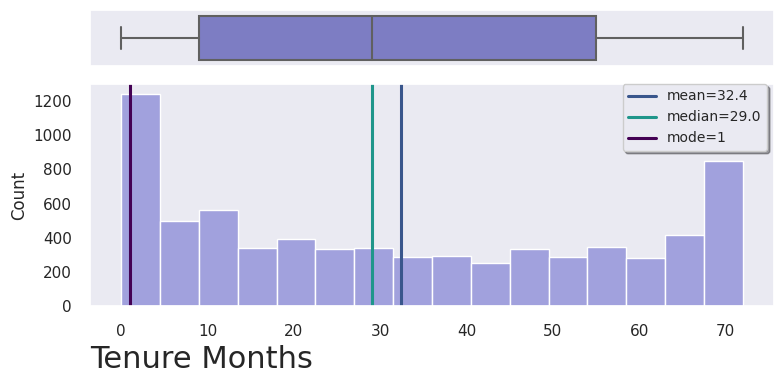

In [ ]:
num_plot(df_copy, 'tenure_months')
plt.show()

**Proporsi**

In [ ]:
#  Proporsi
round(df_copy['games_product'].value_counts(normalize = True)*100,2)
round(df_copy['music_product'].value_counts(normalize = True)*100,2)
round(df_copy['education_product'].value_counts(normalize = True)*100,2)
round(df_copy['video_product'].value_counts(normalize = True)*100,2)
round(df_copy['call_center'].value_counts(normalize = True)*100,2)
round(df_copy['use_myapp'].value_counts(normalize = True)*100,2)
round(df_copy['payment_method'].value_counts(normalize = True)*100,2)
round(df_copy['churn_label'].value_counts(normalize = True)*100,2)
round(df_copy['device_class'].value_counts(normalize = True)*100,2)
round(df_copy['location'].value_counts(normalize = True)*100,2)

Jakarta    71.43
Bandung    28.57
Name: location, dtype: float64

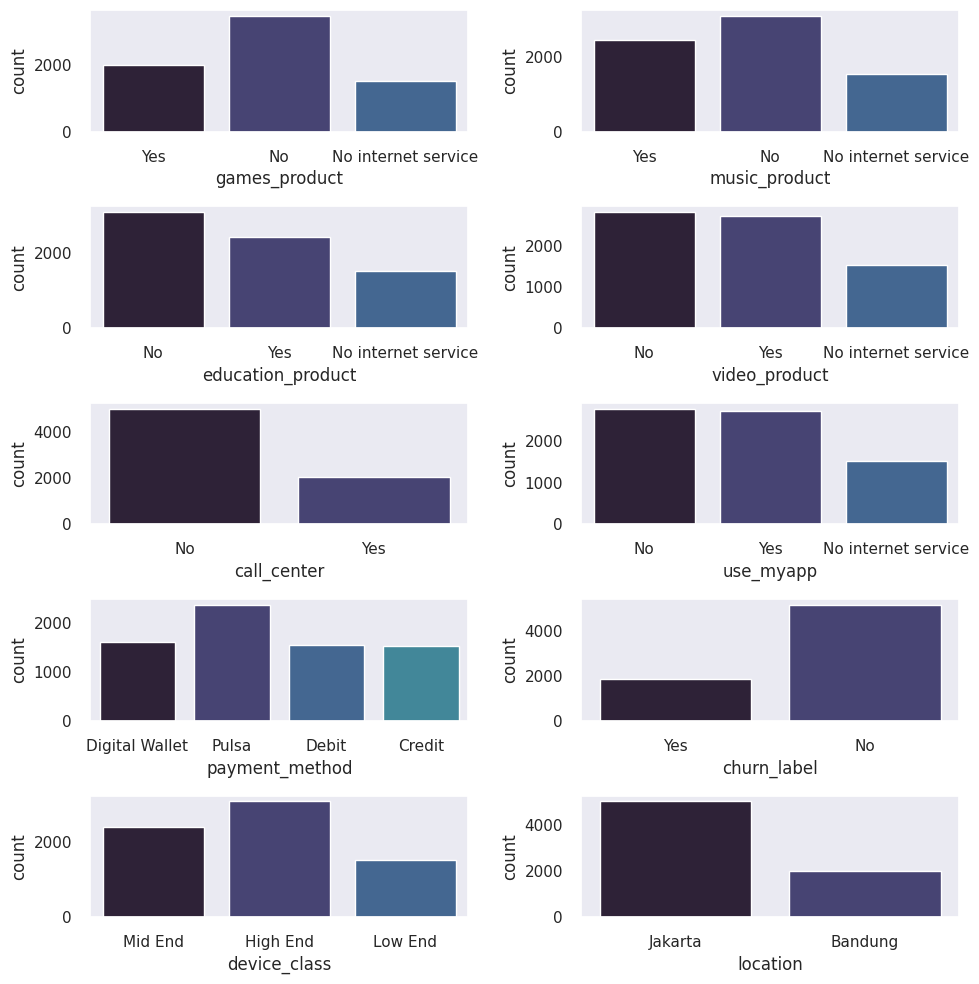

In [ ]:
# Proporsi dengan Plot
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2)
axes = axes.flatten()

sns.countplot(x ='games_product', data = df_copy, ax = axes[0])
sns.countplot(x ='music_product', data = df_copy, ax = axes[1])
sns.countplot(x ='education_product', data = df_copy, ax = axes[2])
sns.countplot(x ='video_product', data = df_copy, ax = axes[3])
sns.countplot(x ='call_center', data = df_copy, ax = axes[4])
sns.countplot(x ='use_myapp', data = df_copy, ax = axes[5])
sns.countplot(x ='payment_method', data = df_copy, ax = axes[6])
sns.countplot(x ='churn_label', data = df_copy, ax = axes[7])
sns.countplot(x ='device_class', data = df_copy, ax = axes[8])
sns.countplot(x ='location', data = df_copy, ax = axes[9])

plt.show()